In [5]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import nashpy as nash
import math as math
import itertools as itertools
from operator import add, neg
from matplotlib.ticker import FixedLocator, FixedFormatter,AutoMinorLocator
import sympy as sympy
from scipy import optimize
import matplotlib.patches as patches
from shapely.geometry import LineString

# Representative Probabilities

In [1]:
fsize=8

probas01=[0.2,0.8, 0.9]
probas02=[0.2,0.5, 0.6]
probas03=[0.2,0.4,0.45]
probas04 =[0.2,0.32, 0.4]
probas05 =[0.2,0.32, 0.44]
probas06 =[0.2,0.32, 0.45]
probas07=[0.2,0.32, 0.46]
probas08=[0.2,0.32, 0.475]
probas09=[0.2,0.25, 0.3]
probas10 =[0.2,0.25, 0.37]
probas11 =[0.2,0.25, 0.385]
probas12 =[0.2,0.25, 0.393]
probas13 =[0.2,0.25, 0.4]
probas14 =[0.2,0.25, 0.45]
probas15=[0.03,0.055,0.8]

# Functions to compute the values iteratively + optimal probabilities

In [2]:
def value_matrix_vertex(A):
    game=nash.Game(A)
    columnP=[] 
    for eq in game.vertex_enumeration(): #game.support_enumeration() ok: #Tous les équilibres
        columnP=eq[1] 
    H_prob=np.around(columnP, decimals=3)
    if list(columnP):
        value=max(np.dot(columnP,A[k,:]) for k in range(A.shape[0]))
    else:
        #print PURE
        print("no eq")
        value=A[0,0] #weird case 
    return(value,H_prob)


class Gamma_k():
    def __init__(self, n,k,p): #n=i cachettes, k=total looks
        self.n=n
        self.k=k
        self.p=p #Vecteur proba
        
        self.matrixk=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...
        self.matrixid=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...

        self.permut=list(itertools.permutations(list(range(1, self.n+1))))
    
        self.signmatrixk=np.asarray([[-1.0 for i in range(n)] for j in range(math.factorial(n))])
        
        self.tractablematrix=[]
        
    def column_index(self,val_list,printer):
        for idx,perm in enumerate(self.permut): #n! Rows 0,1,2,3,4,5
            for cachette in range(self.n): # n Column 0,1,2
                self.matrixid[idx][cachette]=list(perm).index(cachette+1)+1 #décalage 0 et 1
                #print(self.matrixk)
                if self.matrixid[idx][cachette]>self.k:
                    self.signmatrixk[idx][cachette]=0
                    
                else:
                    P=self.p[cachette] #str vaut k-1
                    value=max(0,int(self.k-self.matrixid[idx][cachette]))
                    self.signmatrixk[idx][cachette]=P +(1-P)*val_list[value] #val_list[value] #-1 #p[idx]+(1-p[idx])*self.dicovalues["0"]
   
        self.tractablematrix=np.copy(self.signmatrixk)
        self.signmatrixk=np.flip(np.unique(self.signmatrixk, axis=0),0)
        if printer:
            print(self.signmatrixk)
        V,H_prob=value_matrix_vertex(self.signmatrixk)
        return V,H_prob 


def plots(probas,ax0,ax1, xlims):
    maxiter=9 #rajouter 1 pour avoir nombre itérations
    values=[0]
    Hprobas=np.zeros((len(probas),maxiter))
   
    for k in range(1,maxiter):
        G=Gamma_k(len(probas),k,probas)
        V,H_prob=G.column_index(values,False)
        #print("value=",V)
        values+=[V]
        Hprobas[:,k]=H_prob

    Xaxis=np.linspace(1,maxiter,maxiter)    
    ax0.plot(Xaxis,values)    
    ax0.set_title(probas)
    ax0.set_xlabel("k looks")
    ax0.set_ylabel("Value")
   

    for k in range(len(probas)):
        ax1.plot(Xaxis[1:maxiter]-1,Hprobas[k,1:],label='h'+str(k+1))
    #ax1.set_title(probas)
    ax1.set_xlabel("k looks")
    ax1.set_xlim(xlims)
    ax1.set_ylim([0,1])
    ax1.set_ylabel("Hiding probability")
    ax1.legend()
    
    return(values)


# Boundaries of the 15 domains

In [13]:


def value_matrix_vertex(A):
    game=nash.Game(A)
    columnP=[] 
    for eq in game.vertex_enumeration(): #game.support_enumeration() ok: #Tous les équilibres
        columnP=eq[1] 
    H_prob=np.around(columnP, decimals=3)
    if list(columnP):
        value=max(np.dot(columnP,A[k,:]) for k in range(A.shape[0]))
    else:
        #print PURE
        print("no eq")
        value=A[0,0] #weird case 
    return(value,H_prob)


class Gamma_k():
    def __init__(self, n,k,p): #n=i cachettes, k=total looks
        self.n=n
        self.k=k
        self.p=p #Vecteur proba
        
        self.matrixk=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...
        self.matrixid=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...

        self.permut=list(itertools.permutations(list(range(1, self.n+1))))
    
        self.signmatrixk=np.asarray([[-1.0 for i in range(n)] for j in range(math.factorial(n))])
        
        self.tractablematrix=[]
        
    def column_index(self,val_list,printer):
        for idx,perm in enumerate(self.permut): #n! Rows 0,1,2,3,4,5
            for cachette in range(self.n): # n Column 0,1,2
                self.matrixid[idx][cachette]=list(perm).index(cachette+1)+1 #décalage 0 et 1
                #print(self.matrixk)
                if self.matrixid[idx][cachette]>self.k:
                    self.signmatrixk[idx][cachette]=0
                    
                else:
                    P=self.p[cachette] #str vaut k-1
                    value=max(0,int(self.k-self.matrixid[idx][cachette]))
                    self.signmatrixk[idx][cachette]=P +(1-P)*val_list[value] #val_list[value] #-1 #p[idx]+(1-p[idx])*self.dicovalues["0"]
   
        self.tractablematrix=np.copy(self.signmatrixk)
        self.signmatrixk=np.flip(np.unique(self.signmatrixk, axis=0),0)
        if printer:
            print(self.signmatrixk)
        V,H_prob=value_matrix_vertex(self.signmatrixk)
        return V,H_prob 


def plots(probas,ax0,ax1, xlims):
    maxiter=9 #rajouter 1 pour avoir nombre itérations
    values=[0]
    Hprobas=np.zeros((len(probas),maxiter))
   
    for k in range(1,maxiter):
        G=Gamma_k(len(probas),k,probas)
        V,H_prob=G.column_index(values,False)
        #print("value=",V)
        values+=[V]
        Hprobas[:,k]=H_prob

    Xaxis=np.linspace(1,maxiter,maxiter)    
    ax0.plot(Xaxis,values)    
    ax0.set_title(probas)
    ax0.set_xlabel("k looks")
    ax0.set_ylabel("Value")
   

    for k in range(len(probas)):
        ax1.plot(Xaxis[1:maxiter]-1,Hprobas[k,1:],label='h'+str(k+1))
    #ax1.set_title(probas)
    ax1.set_xlabel("k looks")
    ax1.set_xlim(xlims)
    ax1.set_ylim([0,1])
    ax1.set_ylabel("Hiding probability")
    ax1.legend()
    
    return(values)

epsilon=0.001

def big_function(a,x):
    Y= -(-3 * x**3 * a**4 + 7 * x**2 * a**4 - 3 * x * a**4 + x**4 * a**3 + 6 * x**3 * a**3 - 9 * x**2 * a**3 - 5 * x**4 * a**2 + 2 * x**3 * a**2 + 4 * x**4 * a)/(3 * (x**3 * a**4 - 4 * x**2 * a**4 + 4 * x * a**4 - a**4 - 4 * x**3 * a**3 + 11 * x**2 * a**3 - 6 * x * a**3 + x**4 * a**2 + 2 * x**3 * a**2 - 4 * x**2 * a**2 - 2 * x**4 * a + x**3 * a + x**4)) + (18 * x**7 * a**12 - 38 * x**6 * a**12 + 18 * x**5 * a**12 - 9 * x**9 * a**11 + 30 * x**8 * a**11 - 162 * x**7 * a**11 + 243 * x**6 * a**11 - 90 * x**5 * a**11 + 12 * x**10 * a**10 - 18 * x**9 * a**10 + 57 * x**8 * a**10 + 168 * x**7 * a**10 - 342 * x**6 * a**10 + 108 * x**5 * a**10 - 2 * x**12 * a**9 + 9 * x**11 * a**9 - 75 * x**10 * a**9 + 201 * x**9 * a**9 - 501 * x**8 * a**9 + 342 * x**7 * a**9 + 9 * x**6 * a**9 + 12 * x**12 * a**8 - 30 * x**11 * a**8 + 45 * x**10 * a**8 - 51 * x**9 * a**8 + 327 * x**8 * a**8 - 198 * x**7 * a**8 - 39 * x**12 * a**7 + 93 * x**11 * a**7 + 72 * x**10 * a**7 - 258 * x**9 * a**7 - 9 * x**8 * a**7 + 76 * x**12 * a**6 - 207 * x**11 * a**6 - 21 * x**10 * a**6 + 155 * x**9 * a**6 - 84 * x**12 * a**5 + 210 * x**11 * a**5 - 33 * x**10 * a**5 + 48 * x**12 * a**4 - 75 * x**11 * a**4 - 11 * x**12 * a**3 + np.sqrt(4 * (-3 * x**5 * a**8 + 5 * x**4 * a**8 - 3 * x**3 * a**8 + 4 * x**6 * a**7 + 3 * x**5 * a**7 - 9 * x**4 * a**7 + 6 * x**3 * a**7 - x**8 * a**6 + 3 * x**7 * a**6 - 17 * x**6 * a**6 + 14 * x**5 * a**6 - 9 * x**4 * a**6 + 4 * x**8 * a**5 - 4 * x**7 * a**5 + x**6 * a**5 + 3 * x**5 * a**5 - 9 * x**8 * a**4 + 11 * x**7 * a**4 + 5 * x**6 * a**4 + 10 * x**8 * a**3 - 10 * x**7 * a**3 - 4 * x**8 * a**2)**3 + (18 * x**7 * a**12 - 38 * x**6 * a**12 + 18 * x**5 * a**12 - 9 * x**9 * a**11 + 30 * x**8 * a**11 - 162 * x**7 * a**11 + 243 * x**6 * a**11 - 90 * x**5 * a**11 + 12 * x**10 * a**10 - 18 * x**9 * a**10 + 57 * x**8 * a**10 + 168 * x**7 * a**10 - 342 * x**6 * a**10 + 108 * x**5 * a**10 - 2 * x**12 * a**9 + 9 * x**11 * a**9 - 75 * x**10 * a**9 + 201 * x**9 * a**9 - 501 * x**8 * a**9 + 342 * x**7 * a**9 + 9 * x**6 * a**9 + 12 * x**12 * a**8 - 30 * x**11 * a**8 + 45 * x**10 * a**8 - 51 * x**9 * a**8 + 327 * x**8 * a**8 - 198 * x**7 * a**8 - 39 * x**12 * a**7 + 93 * x**11 * a**7 + 72 * x**10 * a**7 - 258 * x**9 * a**7 - 9 * x**8 * a**7 + 76 * x**12 * a**6 - 207 * x**11 * a**6 - 21 * x**10 * a**6 + 155 * x**9 * a**6 - 84 * x**12 * a**5 + 210 * x**11 * a**5 - 33 * x**10 * a**5 + 48 * x**12 * a**4 - 75 * x**11 * a**4 - 11 * x**12 * a**3)**2)**(1/3))/(3 * 2**(1/3) * (x**3 * a**4 - 4 * x**2 * a**4 + 4 * x * a**4 - a**4 - 4 * x**3 * a**3 + 11 * x**2 * a**3 - 6 * x * a**3 + x**4 * a**2 + 2 * x**3 * a**2 - 4 * x**2 * a**2 - 2 * x**4 * a + x**3 * a + x**4))- (2**(1/3) * (-3 * x**5 * a**8 + 5 * x**4 * a**8 - 3 * x**3 * a**8 + 4 * x**6 * a**7 + 3 * x**5 * a**7 - 9 * x**4 * a**7 + 6 * x**3 * a**7 - x**8 * a**6 + 3 * x**7 * a**6 - 17 * x**6 * a**6 + 14 * x**5 * a**6 - 9 * x**4 * a**6 + 4 * x**8 * a**5 - 4 * x**7 * a**5 + x**6 * a**5 + 3 * x**5 * a**5 - 9 * x**8 * a**4 + 11 * x**7 * a**4 + 5 * x**6 * a**4 + 10 * x**8 * a**3 - 10 * x**7 * a**3 - 4 * x**8 * a**2))/(3 * (x**3 * a**4 - 4 * x**2 * a**4 + 4 * x * a**4 - a**4 - 4 * x**3 * a**3 + 11 * x**2 * a**3 - 6 * x * a**3 + x**4 * a**2 + 2 * x**3 * a**2 - 4 * x**2 * a**2 - 2 * x**4 * a + x**3 * a + x**4) * (18 * x**7 * a**12 - 38 * x**6 * a**12 + 18 * x**5 * a**12 - 9 * x**9 * a**11 + 30 * x**8 * a**11 - 162 * x**7 * a**11 + 243 * x**6 * a**11 - 90 * x**5 * a**11 + 12 * x**10 * a**10 - 18 * x**9 * a**10 + 57 * x**8 * a**10 + 168 * x**7 * a**10 - 342 * x**6 * a**10 + 108 * x**5 * a**10 - 2 * x**12 * a**9 + 9 * x**11 * a**9 - 75 * x**10 * a**9 + 201 * x**9 * a**9 - 501 * x**8 * a**9 + 342 * x**7 * a**9 + 9 * x**6 * a**9 + 12 * x**12 * a**8 - 30 * x**11 * a**8 + 45 * x**10 * a**8 - 51 * x**9 * a**8 + 327 * x**8 * a**8 - 198 * x**7 * a**8 - 39 * x**12 * a**7 + 93 * x**11 * a**7 + 72 * x**10 * a**7 - 258 * x**9 * a**7 - 9 * x**8 * a**7 + 76 * x**12 * a**6 - 207 * x**11 * a**6 - 21 * x**10 * a**6 + 155 * x**9 * a**6 - 84 * x**12 * a**5 + 210 * x**11 * a**5 - 33 * x**10 * a**5 + 48 * x**12 * a**4 - 75 * x**11 * a**4 - 11 * x**12 * a**3 + np.sqrt(4 * (-3 * x**5 * a**8 + 5 * x**4 * a**8 - 3 * x**3 * a**8 + 4 * x**6 * a**7 + 3 * x**5 * a**7 - 9 * x**4 * a**7 + 6 * x**3 * a**7 - x**8 * a**6 + 3 * x**7 * a**6 - 17 * x**6 * a**6 + 14 * x**5 * a**6 - 9 * x**4 * a**6 + 4 * x**8 * a**5 - 4 * x**7 * a**5 + x**6 * a**5 + 3 * x**5 * a**5 - 9 * x**8 * a**4 + 11 * x**7 * a**4 + 5 * x**6 * a**4 + 10 * x**8 * a**3 - 10 * x**7 * a**3 - 4 * x**8 * a**2)**3 + (18 * x**7 * a**12 - 38 * x**6 * a**12 + 18 * x**5 * a**12 - 9 * x**9 * a**11 + 30 * x**8 * a**11 - 162 * x**7 * a**11 + 243 * x**6 * a**11 - 90 * x**5 * a**11 + 12 * x**10 * a**10 - 18 * x**9 * a**10 + 57 * x**8 * a**10 + 168 * x**7 * a**10 - 342 * x**6 * a**10 + 108 * x**5 * a**10 - 2 * x**12 * a**9 + 9 * x**11 * a**9 - 75 * x**10 * a**9 + 201 * x**9 * a**9 - 501 * x**8 * a**9 + 342 * x**7 * a**9 + 9 * x**6 * a**9 + 12 * x**12 * a**8 - 30 * x**11 * a**8 + 45 * x**10 * a**8 - 51 * x**9 * a**8 + 327 * x**8 * a**8 - 198 * x**7 * a**8 - 39 * x**12 * a**7 + 93 * x**11 * a**7 + 72 * x**10 * a**7 - 258 * x**9 * a**7 - 9 * x**8 * a**7 + 76 * x**12 * a**6 - 207 * x**11 * a**6 - 21 * x**10 * a**6 + 155 * x**9 * a**6 - 84 * x**12 * a**5 + 210 * x**11 * a**5 - 33 * x**10 * a**5 + 48 * x**12 * a**4 - 75 * x**11 * a**4 - 11 * x**12 * a**3)**2)**(1/3)))
    return(-Y)

def function_value2(a,b):
    num = 2*b*a**2 + a*b**2 -a**2 * b**2 + a*b**2 *np.sqrt(a**2 - 2*a +5)
    den=2*(b**2+a**2 * b - a*b -a**2)
    c= num/den
    return(c)

class function_V3_1:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag


    def F(self, y):
        a=self.a
        x=self.x
        return( a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a*x*y*(1 - x)/(a*x + a*y + x*y) - a + x)
             
    def find_root(self,bracketmax):
        
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=1.1
        return(R,self.flag)

class function_V3_2:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        f=((1 - y)*(a*x*y*(a - 1)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) + (x - 1)*(-a*x*y*(a - 1)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - a + y) + (y - 1)*(-a*x*y*(x - 1)/(a*x + a*y + x*y) + x))/((y - 1)*(a*x*y*(a - 1)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))
        return(f)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=1  
            else:
                R=-1
        return(R,self.flag)

class function_V3_3:
    def __init__(self,a,x):
        self.a=a
        self.x=x
    def F(self, y):
        a=self.a
        x=self.x
        f=(-a**4*x**4*y**3 + 4*a**4*x**4*y**2 - 5*a**4*x**4*y + 2*a**4*x**4 + 6*a**4*x**3*y**3 - 14*a**4*x**3*y**2 + 9*a**4*x**3*y - a**4*x**3 - 9*a**4*x**2*y**3 + 12*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**4 + 4*a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**4 - a**4*y**3 + 6*a**3*x**4*y**3 - 16*a**3*x**4*y**2 + 11*a**3*x**4*y - a**3*x**4 - 23*a**3*x**3*y**3 + 33*a**3*x**3*y**2 - 8*a**3*x**3*y + 3*a**3*x**2*y**4 + 18*a**3*x**2*y**3 - 13*a**3*x**2*y**2 - 8*a**3*x*y**4 - 4*a**3*x*y**3 + 2*a**3*y**4 - 10*a**2*x**4*y**3 + 15*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**4 + 18*a**2*x**3*y**3 - 14*a**2*x**3*y**2 - 14*a**2*x**2*y**4 - 4*a**2*x**2*y**3 + 10*a**2*x*y**4 + a*x**4*y**4 + 4*a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**4 - 3*a*x**3*y**3 + 10*a*x**2*y**4 - x**4*y**4 - x**4*y**3 + 2*x**3*y**4)/(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)
        return(f)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
        except:
            R=-1 
        return(R)

    
class function_V4_2:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        f=(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 - a**5*x**3*y**4 + 9*a**5*x**3*y**3 - 16*a**5*x**3*y**2 + 10*a**5*x**3*y - 2*a**5*x**3 + 4*a**5*x**2*y**4 - 19*a**5*x**2*y**3 + 20*a**5*x**2*y**2 - 6*a**5*x**2*y - 4*a**5*x*y**4 + 12*a**5*x*y**3 - 6*a**5*x*y**2 + a**5*y**4 - 2*a**5*y**3 + 6*a**4*x**4*y**3 - 14*a**4*x**4*y**2 + 10*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**4 - 44*a**4*x**3*y**3 + 61*a**4*x**3*y**2 - 28*a**4*x**3*y + 4*a**4*x**3 - 18*a**4*x**2*y**4 + 72*a**4*x**2*y**3 - 58*a**4*x**2*y**2 + 12*a**4*x**2*y + 13*a**4*x*y**4 - 34*a**4*x*y**3 + 12*a**4*x*y**2 - 2*a**4*y**4 + 4*a**4*y**3 - a**3*x**4*y**4 - 9*a**3*x**4*y**3 + 14*a**3*x**4*y**2 - 4*a**3*x**4*y - a**3*x**4 - 8*a**3*x**3*y**4 + 59*a**3*x**3*y**3 - 56*a**3*x**3*y**2 + 13*a**3*x**3*y + 18*a**3*x**2*y**4 - 69*a**3*x**2*y**3 + 33*a**3*x**2*y**2 - 6*a**3*x*y**4 + 18*a**3*x*y**3 - a**3*y**4 + 5*a**2*x**4*y**4 - 3*a**2*x**4*y**3 + 5*a**2*x**4*y**2 - 4*a**2*x**4*y - 6*a**2*x**3*y**4 - 14*a**2*x**3*y**3 + 6*a**2*x**3*y**2 + 6*a**2*x**2*y**4 + 10*a**2*x**2*y**3 - 5*a**2*x*y**4 - 7*a*x**4*y**4 + 8*a*x**4*y**3 - 4*a*x**4*y**2 + 10*a*x**3*y**4 - 2*a*x**3*y**3 - 5*a*x**2*y**4 + 2*x**4*y**4 - x**4*y**3 - x**3*y**4)/(a*(a**4*x**3*y**4 - 4*a**4*x**3*y**3 + 6*a**4*x**3*y**2 - 4*a**4*x**3*y + a**4*x**3 - 4*a**4*x**2*y**4 + 11*a**4*x**2*y**3 - 10*a**4*x**2*y**2 + 3*a**4*x**2*y + 4*a**4*x*y**4 - 7*a**4*x*y**3 + 3*a**4*x*y**2 - a**4*y**4 + a**4*y**3 - 6*a**3*x**3*y**4 + 20*a**3*x**3*y**3 - 24*a**3*x**3*y**2 + 12*a**3*x**3*y - 2*a**3*x**3 + 18*a**3*x**2*y**4 - 41*a**3*x**2*y**3 + 29*a**3*x**2*y**2 - 6*a**3*x**2*y - 13*a**3*x*y**4 + 19*a**3*x*y**3 - 6*a**3*x*y**2 + 2*a**3*y**4 - 2*a**3*y**3 + 14*a**2*x**3*y**4 - 37*a**2*x**3*y**3 + 33*a**2*x**3*y**2 - 10*a**2*x**3*y - 29*a**2*x**2*y**4 + 52*a**2*x**2*y**3 - 23*a**2*x**2*y**2 + 13*a**2*x*y**4 - 13*a**2*x*y**3 - 15*a*x**3*y**4 + 29*a*x**3*y**3 - 14*a*x**3*y**2 + 18*a*x**2*y**4 - 18*a*x**2*y**3 + 6*x**3*y**4 - 6*x**3*y**3))
        return(f)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)
    
    
class function_V4_3:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 28*a**4*x**3*y**3 + 44*a**4*x**3*y**2 - 19*a**4*x**3*y + 2*a**4*x**3 + a**4*x**2*y**4 + 34*a**4*x**2*y**3 - 32*a**4*x**2*y**2 + 6*a**4*x**2*y - 2*a**4*x*y**4 - 15*a**4*x*y**3 + 6*a**4*x*y**2 + a**4*y**4 + 2*a**4*y**3 - 18*a**3*x**4*y**3 + 31*a**3*x**4*y**2 - 15*a**3*x**4*y + a**3*x**4 + 2*a**3*x**3*y**4 + 49*a**3*x**3*y**3 - 53*a**3*x**3*y**2 + 11*a**3*x**3*y - 10*a**3*x**2*y**4 - 36*a**3*x**2*y**3 + 21*a**3*x**2*y**2 + 10*a**3*x*y**4 + 9*a**3*x*y**3 - 2*a**3*y**4 + a**2*x**4*y**4 + 18*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 10*a**2*x**3*y**4 - 26*a**2*x**3*y**3 + 15*a**2*x**3*y**2 + 22*a**2*x**2*y**4 + 5*a**2*x**2*y**3 - 10*a**2*x*y**4 - 2*a*x**4*y**4 - 7*a*x**4*y**3 + 4*a*x**4*y**2 + 10*a*x**3*y**4 + 5*a*x**3*y**3 - 10*a*x**2*y**4 + x**4*y**4 + x**4*y**3 - 2*x**3*y**4)/(a**5*x**4*y**3 - 3*a**5*x**4*y**2 + 3*a**5*x**4*y - a**5*x**4 - 5*a**5*x**3*y**3 + 10*a**5*x**3*y**2 - 6*a**5*x**3*y + a**5*x**3 + 8*a**5*x**2*y**3 - 10*a**5*x**2*y**2 + 3*a**5*x**2*y - 5*a**5*x*y**3 + 3*a**5*x*y**2 + a**5*y**3 - 7*a**4*x**4*y**3 + 17*a**4*x**4*y**2 - 13*a**4*x**4*y + 3*a**4*x**4 + 29*a**4*x**3*y**3 - 47*a**4*x**3*y**2 + 21*a**4*x**3*y - 2*a**4*x**3 - 39*a**4*x**2*y**3 + 37*a**4*x**2*y**2 - 6*a**4*x**2*y + 19*a**4*x*y**3 - 6*a**4*x*y**2 - 2*a**4*y**3 + 19*a**3*x**4*y**3 - 34*a**3*x**4*y**2 + 17*a**3*x**4*y - a**3*x**4 - 62*a**3*x**3*y**3 + 71*a**3*x**3*y**2 - 15*a**3*x**3*y + 63*a**3*x**2*y**3 - 31*a**3*x**2*y**2 - 17*a**3*x*y**3 - 24*a**2*x**4*y**3 + 26*a**2*x**4*y**2 - 4*a**2*x**4*y + 56*a**2*x**3*y**3 - 29*a**2*x**3*y**2 - 31*a**2*x**2*y**3 + 12*a*x**4*y**3 - 4*a*x**4*y**2 - 15*a*x**3*y**3 - x**4*y**3)
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)
    
class function_V4_3b:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 21*a**5*x**3*y**3 + 39*a**5*x**3*y**2 - 20*a**5*x**3*y + 2*a**5*x**3 + a**5*x**2*y**4 + 22*a**5*x**2*y**3 - 26*a**5*x**2*y**2 + 6*a**5*x**2*y - 2*a**5*x*y**4 - 10*a**5*x*y**3 + 6*a**5*x*y**2 + a**5*y**4 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 50*a**4*x**4*y**3 + 103*a**4*x**4*y**2 - 61*a**4*x**4*y + 10*a**4*x**4 + 3*a**4*x**3*y**4 + 98*a**4*x**3*y**3 - 135*a**4*x**3*y**2 + 45*a**4*x**3*y - 3*a**4*x**3 - 14*a**4*x**2*y**4 - 73*a**4*x**2*y**3 + 63*a**4*x**2*y**2 - 9*a**4*x**2*y + 15*a**4*x*y**4 + 24*a**4*x*y**3 - 9*a**4*x*y**2 - 4*a**4*y**4 - 3*a**4*y**3 - 22*a**3*x**5*y**3 + 46*a**3*x**5*y**2 - 25*a**3*x**5*y + 2*a**3*x**5 + 3*a**3*x**4*y**4 + 100*a**3*x**4*y**3 - 147*a**3*x**4*y**2 + 53*a**3*x**4*y - 3*a**3*x**4 - 24*a**3*x**3*y**4 - 134*a**3*x**3*y**3 + 131*a**3*x**3*y**2 - 20*a**3*x**3*y + 52*a**3*x**2*y**4 + 61*a**3*x**2*y**3 - 33*a**3*x**2*y**2 - 32*a**3*x*y**4 - 12*a**3*x*y**3 + 4*a**3*y**4 + a**2*x**5*y**4 + 24*a**2*x**5*y**3 - 32*a**2*x**5*y**2 + 8*a**2*x**5*y - 14*a**2*x**4*y**4 - 75*a**2*x**4*y**3 + 72*a**2*x**4*y**2 - 12*a**2*x**4*y + 52*a**2*x**3*y**4 + 58*a**2*x**3*y**3 - 32*a**2*x**3*y**2 - 64*a**2*x**2*y**4 - 6*a**2*x**2*y**3 + 20*a**2*x*y**4 - 2*a*x**5*y**4 - 11*a*x**5*y**3 + 8*a*x**5*y**2 + 15*a*x**4*y**4 + 25*a*x**4*y**3 - 12*a*x**4*y**2 - 32*a*x**3*y**4 - 11*a*x**3*y**3 + 20*a*x**2*y**4 + x**5*y**4 + 2*x**5*y**3 - 4*x**4*y**4 - 3*x**4*y**3 + 4*x**3*y**4)
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)    
    
class function_V5_2:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        f=(-a**6*x**4*y**3 + 3*a**6*x**4*y**2 - 3*a**6*x**4*y + a**6*x**4 - a**6*x**3*y**4 + 9*a**6*x**3*y**3 - 16*a**6*x**3*y**2 + 10*a**6*x**3*y - 2*a**6*x**3 + 4*a**6*x**2*y**4 - 19*a**6*x**2*y**3 + 20*a**6*x**2*y**2 - 6*a**6*x**2*y - 4*a**6*x*y**4 + 12*a**6*x*y**3 - 6*a**6*x*y**2 + a**6*y**4 - 2*a**6*y**3 + 7*a**5*x**4*y**3 - 17*a**5*x**4*y**2 + 13*a**5*x**4*y - 3*a**5*x**4 + 7*a**5*x**3*y**4 - 53*a**5*x**3*y**3 + 77*a**5*x**3*y**2 - 38*a**5*x**3*y + 6*a**5*x**3 - 22*a**5*x**2*y**4 + 91*a**5*x**2*y**3 - 78*a**5*x**2*y**2 + 18*a**5*x**2*y + 17*a**5*x*y**4 - 46*a**5*x*y**3 + 18*a**5*x*y**2 - 3*a**5*y**4 + 6*a**5*y**3 - a**4*x**4*y**4 - 16*a**4*x**4*y**3 + 31*a**4*x**4*y**2 - 17*a**4*x**4*y + 2*a**4*x**4 - 15*a**4*x**3*y**4 + 109*a**4*x**3*y**3 - 127*a**4*x**3*y**2 + 47*a**4*x**3*y - 5*a**4*x**3 + 39*a**4*x**2*y**4 - 151*a**4*x**2*y**3 + 101*a**4*x**2*y**2 - 15*a**4*x**2*y - 22*a**4*x*y**4 + 58*a**4*x*y**3 - 15*a**4*x*y**2 + 2*a**4*y**4 - 5*a**4*y**3 + 6*a**3*x**4*y**4 + 9*a**3*x**4*y**3 - 15*a**3*x**4*y**2 + 3*a**3*x**4*y + a**3*x**4 + 5*a**3*x**3*y**4 - 85*a**3*x**3*y**3 + 74*a**3*x**3*y**2 - 16*a**3*x**3*y - 18*a**3*x**2*y**4 + 91*a**3*x**2*y**3 - 39*a**3*x**2*y**2 + 4*a**3*x*y**4 - 21*a**3*x*y**3 + a**3*y**4 - 13*a**2*x**4*y**4 + 11*a**2*x**4*y**3 - 8*a**2*x**4*y**2 + 4*a**2*x**4*y + 16*a**2*x**3*y**4 + 13*a**2*x**3*y**3 - 7*a**2*x**3*y**2 - 10*a**2*x**2*y**4 - 11*a**2*x**2*y**3 + 5*a**2*x*y**4 + 11*a*x**4*y**4 - 11*a*x**4*y**3 + 4*a*x**4*y**2 - 13*a*x**3*y**4 + 4*a*x**3*y**3 + 5*a*x**2*y**4 - 2*x**4*y**4 + x**4*y**3 + x**3*y**4)
        return(f)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)
    
class function_V5_3:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g= -(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)
    
class function_V5_3b:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g= -(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)
    
class function_V6_3:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(y + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(y + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) - 1 - (-y - (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)

class function_V6_3b:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(y + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(y + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) - 1 - (-y - (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)

In [14]:
class function_V7_3:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=-(-1 - (-x - (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))))*(y + (1 - y)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))*(y + (1 - y)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) - (a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))*(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))))) - 1 - (-y - (1 - y)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - (a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) + (-(a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-(-1 - (-x - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/((x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3)))/(x + (1 - x)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (a + (1 - a)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))*(x + (1 - x)*(-a*x*y*(1 - a)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + a))/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**4*y**3 + 3*a**5*x**4*y**2 - 3*a**5*x**4*y + a**5*x**4 + 5*a**5*x**3*y**3 - 10*a**5*x**3*y**2 + 6*a**5*x**3*y - a**5*x**3 - 8*a**5*x**2*y**3 + 10*a**5*x**2*y**2 - 3*a**5*x**2*y + 5*a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 7*a**4*x**4*y**3 - 17*a**4*x**4*y**2 + 13*a**4*x**4*y - 3*a**4*x**4 - 29*a**4*x**3*y**3 + 47*a**4*x**3*y**2 - 21*a**4*x**3*y + 2*a**4*x**3 + 39*a**4*x**2*y**3 - 37*a**4*x**2*y**2 + 6*a**4*x**2*y - 19*a**4*x*y**3 + 6*a**4*x*y**2 + 2*a**4*y**3 - 19*a**3*x**4*y**3 + 34*a**3*x**4*y**2 - 17*a**3*x**4*y + a**3*x**4 + 62*a**3*x**3*y**3 - 71*a**3*x**3*y**2 + 15*a**3*x**3*y - 63*a**3*x**2*y**3 + 31*a**3*x**2*y**2 + 17*a**3*x*y**3 + 24*a**2*x**4*y**3 - 26*a**2*x**4*y**2 + 4*a**2*x**4*y - 56*a**2*x**3*y**3 + 29*a**2*x**3*y**2 + 31*a**2*x**2*y**3 - 12*a*x**4*y**3 + 4*a*x**4*y**2 + 15*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))))))
        
        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)


class function_V7_3b:
    def __init__(self,a,x,flag):
        self.a=a
        self.x=x
        self.flag=flag
    def F(self, y):
        a=self.a
        x=self.x
        g=-(-1 - (-x - (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))))*(y + (1 - y)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))*(y + (1 - y)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) - (a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))*(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))))) - 1 - (-y - (1 - y)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))*(1 - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))))/(x + (1 - x)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - (a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))*(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)/(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) + (-(a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)) + 1)*(-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-(-1 - (-x - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))) - 1 - (a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/((x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))*(a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + (1 - y)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3) - (-a*x*y*(1 - x)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) - (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(-a*x*y*(1 - y)*(a*x*y - 2*a*x - 3*a*y - 2*x*y)*(a*x*y - a*x - a*y - 2*x*y)/((a*x + a*y + x*y)*(a**2*x**2*y - a**2*x**2 + a**2*x*y**2 - 2*a**2*x*y - a**2*y**2 + a*x**2*y**2 - 3*a*x**2*y - 4*a*x*y**2 - x**2*y**2)) + y)/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3)))/(x + (1 - x)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3) - (a + (1 - a)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))*(x + (1 - x)*(a**4*x**4*y**3 - 4*a**4*x**4*y**2 + 5*a**4*x**4*y - 2*a**4*x**4 - 6*a**4*x**3*y**3 + 15*a**4*x**3*y**2 - 10*a**4*x**3*y + a**4*x**3 + 11*a**4*x**2*y**3 - 15*a**4*x**2*y**2 + 3*a**4*x**2*y - 7*a**4*x*y**3 + 3*a**4*x*y**2 + a**4*y**3 - 6*a**3*x**4*y**3 + 17*a**3*x**4*y**2 - 12*a**3*x**4*y + a**3*x**4 + 27*a**3*x**3*y**3 - 42*a**3*x**3*y**2 + 10*a**3*x**3*y - 34*a**3*x**2*y**3 + 19*a**3*x**2*y**2 + 10*a**3*x*y**3 + 12*a**2*x**4*y**3 - 19*a**2*x**4*y**2 + 4*a**2*x**4*y - 35*a**2*x**3*y**3 + 22*a**2*x**3*y**2 + 22*a**2*x**2*y**3 - 8*a*x**4*y**3 + 4*a*x**4*y**2 + 11*a*x**3*y**3 + x**4*y**3)/(a**4*x**3*y - a**4*x**3 + 2*a**4*x**2*y**2 - 3*a**4*x**2*y + a**4*x*y**3 - 3*a**4*x*y**2 - a**4*y**3 + a**3*x**4*y - a**3*x**4 + 4*a**3*x**3*y**2 - 9*a**3*x**3*y + 2*a**3*x**3 + 3*a**3*x**2*y**3 - 16*a**3*x**2*y**2 + 6*a**3*x**2*y - 8*a**3*x*y**3 + 6*a**3*x*y**2 + 2*a**3*y**3 + 2*a**2*x**4*y**2 - 4*a**2*x**4*y + 3*a**2*x**3*y**3 - 17*a**2*x**3*y**2 + 8*a**2*x**3*y - 14*a**2*x**2*y**3 + 18*a**2*x**2*y**2 + 10*a**2*x*y**3 + a*x**4*y**3 - 4*a*x**4*y**2 - 8*a*x**3*y**3 + 8*a*x**3*y**2 + 10*a*x**2*y**3 - x**4*y**3 + 2*x**3*y**3))/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))) + 1/(a + (1 - a)*(-a**5*x**5*y**3 + 4*a**5*x**5*y**2 - 5*a**5*x**5*y + 2*a**5*x**5 + 8*a**5*x**4*y**3 - 22*a**5*x**4*y**2 + 19*a**5*x**4*y - 5*a**5*x**4 - 22*a**5*x**3*y**3 + 42*a**5*x**3*y**2 - 22*a**5*x**3*y + 2*a**5*x**3 + 27*a**5*x**2*y**3 - 31*a**5*x**2*y**2 + 6*a**5*x**2*y - 14*a**5*x*y**3 + 6*a**5*x*y**2 + 2*a**5*y**3 + 8*a**4*x**5*y**3 - 24*a**4*x**5*y**2 + 21*a**4*x**5*y - 5*a**4*x**5 - 52*a**4*x**4*y**3 + 109*a**4*x**4*y**2 - 65*a**4*x**4*y + 10*a**4*x**4 + 118*a**4*x**3*y**3 - 164*a**4*x**3*y**2 + 53*a**4*x**3*y - 3*a**4*x**3 - 114*a**4*x**2*y**3 + 83*a**4*x**2*y**2 - 9*a**4*x**2*y + 40*a**4*x*y**3 - 9*a**4*x*y**2 - 3*a**4*y**3 - 23*a**3*x**5*y**3 + 49*a**3*x**5*y**2 - 27*a**3*x**5*y + 2*a**3*x**5 + 121*a**3*x**4*y**3 - 178*a**3*x**4*y**2 + 61*a**3*x**4*y - 3*a**3*x**4 - 217*a**3*x**3*y**3 + 191*a**3*x**3*y**2 - 28*a**3*x**3*y + 149*a**3*x**2*y**3 - 53*a**3*x**2*y**2 - 28*a**3*x*y**3 + 30*a**2*x**5*y**3 - 39*a**2*x**5*y**2 + 8*a**2*x**5*y - 122*a**2*x**4*y**3 + 100*a**2*x**4*y**2 - 12*a**2*x**4*y + 154*a**2*x**3*y**3 - 60*a**2*x**3*y**2 - 58*a**2*x**2*y**3 - 16*a*x**5*y**3 + 8*a*x**5*y**2 + 45*a*x**4*y**3 - 12*a*x**4*y**2 - 31*a*x**3*y**3 + 2*x**5*y**3 - 3*x**4*y**3)/(a**5*x**3*y - a**5*x**3 + 2*a**5*x**2*y**2 - 3*a**5*x**2*y + a**5*x*y**3 - 3*a**5*x*y**2 - a**5*y**3 + 2*a**4*x**4*y - 2*a**4*x**4 + 6*a**4*x**3*y**2 - 14*a**4*x**3*y + 4*a**4*x**3 + 4*a**4*x**2*y**3 - 23*a**4*x**2*y**2 + 12*a**4*x**2*y - 11*a**4*x*y**3 + 12*a**4*x*y**2 + 4*a**4*y**3 + a**3*x**5*y - a**3*x**5 + 6*a**3*x**4*y**2 - 15*a**3*x**4*y + 4*a**3*x**4 + 6*a**3*x**3*y**3 - 41*a**3*x**3*y**2 + 32*a**3*x**3*y - 4*a**3*x**3 - 28*a**3*x**2*y**3 + 56*a**3*x**2*y**2 - 12*a**3*x**2*y + 28*a**3*x*y**3 - 12*a**3*x*y**2 - 4*a**3*y**3 + 2*a**2*x**5*y**2 - 4*a**2*x**5*y + 4*a**2*x**4*y**3 - 25*a**2*x**4*y**2 + 16*a**2*x**4*y - 28*a**2*x**3*y**3 + 60*a**2*x**3*y**2 - 16*a**2*x**3*y + 48*a**2*x**2*y**3 - 36*a**2*x**2*y**2 - 20*a**2*x*y**3 + a*x**5*y**3 - 4*a*x**5*y**2 - 11*a*x**4*y**3 + 16*a*x**4*y**2 + 28*a*x**3*y**3 - 16*a*x**3*y**2 - 20*a*x**2*y**3 - x**5*y**3 + 4*x**4*y**3 - 4*x**3*y**3))))))

        return(g)
    def find_root(self,bracketmax):
        try:
            sol = optimize.root_scalar(self.F, bracket=[self.a, bracketmax], method='brentq')
            R=sol.root
            self.flag=self.x
        except:
            if self.x<self.flag:
                R=-1  
            else:
                R=-1
        return(R,self.flag)



In [8]:


def Domain_2(p1,plot,ax1,bracketmax,coloris):
    B1=np.linspace(0,1,201)
    C1=[]
    for b in B1:
        C1+=[function_value2(p1,b)]
    Cmod=[3 if c<=0 else c for c in C1]
    if plot:
        ax1.plot(B1,Cmod,color=coloris,linewidth=2,zorder=3)
    return(B1,Cmod)

def Domain_3(p1,plot,ax1,bracketmax,coloris): #blue
    L1=[]
    L1m=[]
    L2=[]
    L2m=[]
    L3=[]
    X=np.linspace(p1,1,40)
    
    flag=1
    flag2=1
    for x in X:
        r,flag=function_V3_1(p1,x,flag).find_root(bracketmax)
        L1+=[r]
        r,flag2=function_V3_2(p1,x,flag2).find_root(bracketmax)
        L2+=[r]
    firstline=LineString(np.column_stack((X,np.nan_to_num(L1,1))))
    secondline = LineString(np.column_stack((X,np.nan_to_num(L2,1))))

    intersectionA = firstline.intersection(secondline)    
    try:
        xcross3=intersectionA.xy[0][0]
        ycross3=intersectionA.xy[1][0]
        Xred3=np.linspace(p1,xcross3,40)
        Xm3=np.linspace(xcross3,1,40)
    except:
        print(intersectionA)
        xcross3=input()
        ycross3=input()
        Xred3=np.linspace(p1,float(xcross3),40)
        Xm3=np.linspace(float(xcross3),1,40)
    flag=1
    flag2=1
    for x in Xm3:
        r,flag=function_V3_2(p1,x,flag).find_root(bracketmax)
        L2m+=[r]
        r,flag2=function_V3_1(p1,x,flag2).find_root(bracketmax)
        L1m+=[r]
    for x in Xred3:    
        L3+=[function_V3_3(p1,x).find_root(bracketmax)]  
    if plot:
        ax1.plot(Xm3,L1m,color=coloris,zorder=3)
        ax1.plot(Xm3,L2m,color=coloris,zorder=3)
        ax1.plot(Xred3,L3,color=coloris,zorder=3)
    return(L1,Xm3,L1m,Xm3,L2m,Xred3,L3,L2,X)



def Domain_4(p1,plot,ax1,L1,bracketmax,coloris): #green
    M1=np.repeat((2*p1-p1**2),40)
    M2=[]
    M2m=[]
    M3inter=[]
    X=np.linspace(p1,1,40)
    flag=1
    for x in X:
        r,flag=function_V4_2(p1,x,flag).find_root(bracketmax)
        M2+= [r]

    firstline=LineString(np.column_stack((X,np.nan_to_num(M1,1))))
    secondline = LineString(np.column_stack((X,np.nan_to_num(M2,1))))   
    intersectionB = firstline.intersection(secondline)
    
    try:
        xcross4=intersectionB.xy[1][0]
        ycross4=intersectionB.xy[0][0]
        Xred4=np.linspace(p1,xcross4,40)
        Xm4=np.linspace(xcross4,1,40)
    except:
        print(intersectionB)
        xcross4=input()
        ycross4=input()
        Xred4=np.linspace(p1,float(xcross4),40)
        Xm4=np.linspace(float(xcross4),1,40)
    
    flag=1    
    for x in Xm4:
        r,flag=function_V4_2(p1,x,flag).find_root(bracketmax)
        M2m+=[r]
    flag=1    
    for x in Xred4:    
        r,flag=function_V4_3(p1,x,flag).find_root(bracketmax)
        M3inter+=[r]

    thirdline=LineString(np.column_stack((X,np.nan_to_num(L1,1))))
    quaterline = LineString(np.column_stack((Xred4,np.nan_to_num(M3inter,1))))   
    intersection34 = thirdline.intersection(quaterline)   
    try:
        yintercross4=intersection34.xy[1][0]
        xintercross4=intersection34.xy[0][0]    
        Xhalf1_v4=np.linspace(p1,xintercross4,40)
        Xhalf2_v4=np.linspace(xintercross4,xcross4,40)
    except:
        print(intersection34)
        yintercross4=input()
        xintercross4=input()    
        Xhalf1_v4=np.linspace(p1,float(xintercross4),40)
        Xhalf2_v4=np.linspace(float(xintercross4),xcross4,40)
        
        
    M3=[]
    M3b=[]
    flag=1    
    for x in Xhalf2_v4:    
        r,flag=function_V4_3(p1,x,flag).find_root(bracketmax)
        M3+=[r]
    for x in Xhalf1_v4:    
        r,flag=function_V4_3b(p1,x,flag).find_root(bracketmax)
        M3b+=[r]
    if plot:
        ax1.vlines(2*p1-p1**2,ycross4,1,color=coloris,zorder=1)   
        ax1.plot(Xm4,M2m,color=coloris,zorder=3)
        ax1.plot(Xhalf2_v4,M3,color=coloris,zorder=3)
        ax1.plot(Xhalf1_v4,M3b,color=coloris,zorder=3)
    return(Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2)


def Domain_5(p1,plot,ax1,L1,bracketmax,coloris):
    N1=np.repeat((2*p1-p1**2),40)
    N2=[]
    N2m=[]
    N3inter=[]
    N3interb=[]
    X=np.linspace(p1,1,40)
    flag=1
    for x in X:
        r,flag=function_V5_2(p1,x,flag).find_root(bracketmax)
        N2+= [r]

    firstline=LineString(np.column_stack((X,np.nan_to_num(N1,1))))
    secondline = LineString(np.column_stack((X,np.nan_to_num(N2,1))))   
    intersectionC = firstline.intersection(secondline)
    xcross5=intersectionC.xy[1][0]
    ycross5=intersectionC.xy[0][0]
    Xred5=np.linspace(p1,xcross5,40)
    Xm5=np.linspace(xcross5,1,40)
    flag=1    
    for x in Xm5:
        r,flag=function_V5_2(p1,x,flag).find_root(bracketmax)
        N2m+=[r]
    flag=1    
    for x in Xred5:    
        r,flag=function_V5_3(p1,x,flag).find_root(bracketmax)
        N3inter+=[r]
        r,flag=function_V5_3b(p1,x,flag).find_root(bracketmax)
        N3interb+=[r]
    thirdline=LineString(np.column_stack((X,np.nan_to_num(L1,1))))
    quaterline = LineString(np.column_stack((Xred5,np.nan_to_num(N3inter,1))))   
    intersection34 = thirdline.intersection(quaterline)    
    yintercross5=intersection34.xy[1][0]
    xintercross5=intersection34.xy[0][0]    
    Xhalf1_v5=np.linspace(p1,xintercross5,40)
    Xhalf2_v5=np.linspace(xintercross5,xcross5,40)
    N3=[]
    N3b=[]
    flag=1    
    for x in Xhalf2_v5:    
        r,flag=function_V5_3(p1,x,flag).find_root(bracketmax)
        N3+=[r]
    for x in Xhalf1_v5:    
        r,flag=function_V5_3b(p1,x,flag).find_root(bracketmax)
        N3b+=[r]
        
    if plot:
        ax1.vlines(2*p1-p1**2,ycross5,1,color=coloris,zorder=3)   
        ax1.plot(Xm5,N2m,color=coloris,zorder=3)
        ax1.plot(Xhalf2_v5,N3,color=coloris,zorder=3)
        ax1.plot(Xhalf1_v5,N3b,color=coloris,zorder=3)
    return(xcross5,ycross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b)



def Domain_6(p1,plot,ax1,L1,xcross5,ycross5,bracketmax,coloris,Xm5,N2m): #'tab:grey'
    X=np.linspace(p1,1,40)    
    P3inter=[]
    Xred6=np.linspace(p1,xcross5,10) #c'est bien xcross5 mais pas Xred5 car moins de points
    flag=1
    for x in Xred6:    
        r,flag=function_V6_3(p1,x,flag).find_root(bracketmax)
        P3inter+=[r]
    thirdline=LineString(np.column_stack((X,np.nan_to_num(L1,1))))
    quaterline = LineString(np.column_stack((Xred6,np.nan_to_num(P3inter,1))))   
    intersection34 = thirdline.intersection(quaterline)    
    yintercross6=intersection34.xy[1][0]
    xintercross6=intersection34.xy[0][0]    
    Xhalf1_v6=np.linspace(p1,xintercross6,40)
    Xhalf2_v6=np.linspace(xintercross6,xcross5,40) #xcross5
    P3=[]
    P3b=[]
    flag=1    
    for x in Xhalf2_v6:    
        r,flag=function_V6_3(p1,x,flag).find_root(bracketmax)
        P3+=[r]
    for x in Xhalf1_v6:    
        r,flag=function_V6_3b(p1,x,flag).find_root(bracketmax)
        P3b+=[r]    
        
    if plot:
        ax1.vlines(2*p1-p1**2,ycross5,1,color=coloris,zorder=3)   
        ax1.plot(Xm5,N2m,color=coloris,zorder=3)
        ax1.plot(Xhalf2_v6,P3,color=coloris,zorder=3) #Xred5 si toute la ligne
        ax1.plot(Xhalf1_v6,P3b,color=coloris,zorder=3)
    return(xintercross6,Xhalf2_v6,P3,Xhalf1_v6,P3b) 




def Domain_7(p1,plot,ax1,L1,xcross5,ycross5,xintercross6,bracketmax,coloris,Xm5,N2m): #'tab:orange'
    Xhalf1_v7=np.linspace(p1,xintercross6,20)
    Xhalf2_v7=np.linspace(xintercross6,xcross5,20) #xcross5
    Q3=[]
    Q3b=[]
    flag=1    
    for x in Xhalf2_v7:    
        r,flag=function_V7_3(p1,x,flag).find_root(bracketmax)
        Q3+=[r]
    for x in Xhalf1_v7:    
        r,flag=function_V7_3b(p1,x,flag).find_root(bracketmax)
        Q3b+=[r]
        
    if plot:
        ax1.vlines(2*p1-p1**2,ycross5,1,color=coloris,zorder=3)   
        ax1.plot(Xm5,N2m,color=coloris,zorder=3)
        ax1.plot(Xhalf2_v7,Q3,color=coloris,zorder=3) #Xred5 si toute la ligne
        ax1.plot(Xhalf1_v7,Q3b,color=coloris,zorder=3)
    return(Xhalf2_v7,Q3,Xhalf1_v7,Q3b)


#####################################


In [27]:
def value_vertex(A):
    game=nash.Game(A)
    columnP=[] #default value
    columnS=[]
    for eq in game.vertex_enumeration(): #game.support_enumeration() ok: #Tous les équilibres
        columnP=eq[1] 
        columnS=eq[0] 
    H_prob=np.around(columnP, decimals=12)
    S_prob=np.around(columnS, decimals=12)
    value=A[0,0]
    if list(columnP):
        value=max(np.dot(columnP,A[k,:]) for k in range(A.shape[0]))
    else:
        value=A[0,0]
    return(value,H_prob,S_prob)


class Gamma_k():
    def __init__(self, n,k,p): #n=i cachettes, k=total looks
        self.n=n
        self.k=k
        self.p=p #Vecteur proba
        self.matrixk=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...
        self.matrixid=np.asarray([[0.0 for i in range(n)] for j in range(math.factorial(n))])#Matrix de float sinon arrondi à 0...
        self.permut=list(itertools.permutations(list(range(1, self.n+1))))
        self.signmatrixk=np.asarray([[-1.0 for i in range(n)] for j in range(math.factorial(n))])
        self.tractablematrix=[]   
    def column_index(self,val_list,printer):
        for idx,perm in enumerate(self.permut): #n! Rows 0,1,2,3,4,5
            for cachette in range(self.n): # n Column 0,1,2
                self.matrixid[idx][cachette]=list(perm).index(cachette+1)+1 #décalage 0 et 1
                #print(self.matrixk)
                if self.matrixid[idx][cachette]>self.k:
                    self.signmatrixk[idx][cachette]=0   
                else:
                    P=self.p[cachette] #str vaut k-1
                    value=max(0,int(self.k-self.matrixid[idx][cachette]))
                    self.signmatrixk[idx][cachette]=P +(1-P)*val_list[value] #val_list[value] #-1 #p[idx]+(1-p[idx])*self.dicovalues["0"]
        if printer:
            print(self.signmatrixk)
        V,H_prob,S_prob=value_vertex(self.signmatrixk)
        return V,H_prob,S_prob 


    
def plots_only(probas,ax1, xlims, quoi):
    maxiter=9 #rajouter 1 pour avoir nombre itérations
    values=[0]
    Hprobas=np.zeros((len(probas),maxiter))
    Sprobas=np.zeros((math.factorial((len(probas))),maxiter))
    for k in range(1,maxiter):
        G=Gamma_k(len(probas),k,probas)
        
        V,H_prob,S_prob =G.column_index(values,False)
        values+=[V]
        Hprobas[:,k]=H_prob
        Sprobas[:,k]=S_prob
    Sprobas[0,1]=Sprobas[1,1]
    Sprobas[2,1]=Sprobas[3,1]
    Sprobas[4,1]=Sprobas[5,1]
    Xaxis=np.linspace(1,maxiter,maxiter)    
    
    ls=['-','-','-']
    lsbis=['-','--','-','--','-','--']
    #ls=['-','-.','--']
    colors=['#377eb8', '#ff7f00', '#4daf4a']
    colorbis=['#377eb8','#377eb8', '#ff7f00','#ff7f00', '#4daf4a', '#4daf4a']
    
    if quoi==0:
        for k in range(len(probas)):
            ax1.plot(Xaxis[1:maxiter]-1,Hprobas[k,1:],label='h'+str(k+1),linestyle='-', color=colors[k])
        ax1.set_xlim(xlims)
        ax1.set_ylim([0,1.01])
    else:
        for k in range(math.factorial(len(probas))):
            ax1.plot(Xaxis[1:maxiter]-1,Sprobas[k,1:],label='s'+str(k+1),linestyle=lsbis[k], color=colorbis[k])
        ax1.set_xlim(xlims)
        ax1.set_ylim([0,1.01])
    return(values)



# Hiding Probabilities

C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c, A_ub=A, b_ub=b)
C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(c, A_ub=A, b_ub=b)
C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. 

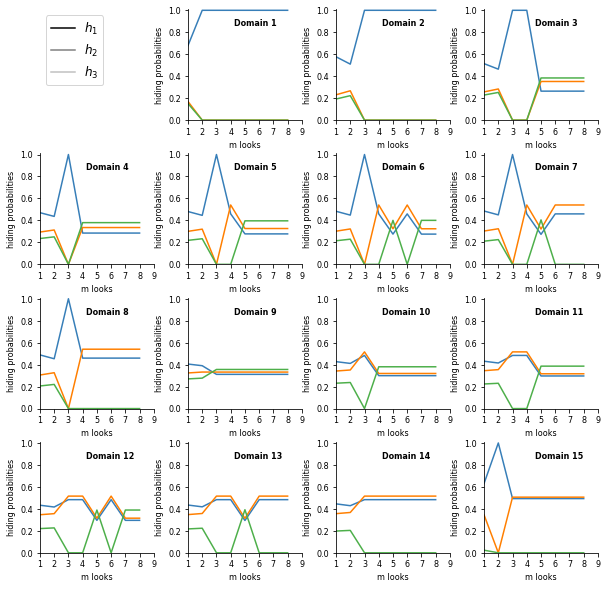

In [28]:
x_formatter = FixedFormatter([1,2,3,4,5,6,7,8,9])
x_locator = FixedLocator([1,2,3,4,5,6,7,8,9])


fig= plt.figure(figsize=(10,10))

ax0=plt.subplot2grid((4,4),(0,0))
ax1=plt.subplot2grid((4,4),(0,1))
ax2=plt.subplot2grid((4,4),(0,2))
ax3=plt.subplot2grid((4,4),(0,3))
ax4=plt.subplot2grid((4,4),(1,0))
ax5=plt.subplot2grid((4,4),(1,1))
ax6=plt.subplot2grid((4,4),(1,2))
ax7=plt.subplot2grid((4,4),(1,3))
ax8=plt.subplot2grid((4,4),(2,0))
ax9=plt.subplot2grid((4,4),(2,1))
ax10=plt.subplot2grid((4,4),(2,2))
ax11=plt.subplot2grid((4,4),(2,3))
ax12=plt.subplot2grid((4,4),(3,0))
ax13=plt.subplot2grid((4,4),(3,1))
ax14=plt.subplot2grid((4,4),(3,2))
ax15=plt.subplot2grid((4,4),(3,3))


ax0.plot([10],[10],label=r'$h_1$',color='black')
ax0.plot([10],[10],label=r'$h_2$',color='grey')
ax0.plot([10],[10],label=r'$h_3$',color='silver')
ax0.set_ylim([0,1])
ax0.legend(loc=2, prop={'size': fsize+4})
ax0.set_axis_off()

quoi=0
player='hiding '

values01=plots_only(probas01, ax1, [1,9],quoi)
values02=plots_only(probas02, ax2, [1,9],quoi)
values03=plots_only(probas03, ax3, [1,9],quoi)
values04=plots_only(probas04, ax4, [1,9],quoi)
values05=plots_only(probas05, ax5, [1,9],quoi)
values06=plots_only(probas06, ax6, [1,9],quoi)
values07=plots_only(probas07, ax7, [1,9],quoi)
values08=plots_only(probas08, ax8, [1,9],quoi)
values09=plots_only(probas09, ax9, [1,9],quoi)
values10 =plots_only(probas10,ax10,[1,9],quoi)
values11 =plots_only(probas11,ax11,[1,9],quoi)
values12 =plots_only(probas12,ax12,[1,9],quoi)
values13 =plots_only(probas13,ax13,[1,9],quoi)
values14 =plots_only(probas14,ax14,[1,9],quoi)
values15 =plots_only(probas15,ax15,[1,9],quoi)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)
ax15.spines['top'].set_visible(False)
ax15.spines['right'].set_visible(False)


ax1.text(0.4,0.85,'Domain 1',transform=ax1.transAxes, fontsize=fsize,fontweight='bold')
ax2.text(0.4,0.85,'Domain 2',transform=ax2.transAxes, fontsize=fsize,fontweight='bold')
ax3.text(0.45,0.85,'Domain 3',transform=ax3.transAxes, fontsize=fsize,fontweight='bold')
ax4.text(0.4,0.85,'Domain 4',transform=ax4.transAxes, fontsize=fsize,fontweight='bold')
ax5.text(0.4,0.85,'Domain 5',transform=ax5.transAxes, fontsize=fsize,fontweight='bold')
ax6.text(0.4,0.85,'Domain 6',transform=ax6.transAxes, fontsize=fsize,fontweight='bold')
ax7.text(0.45,0.85,'Domain 7',transform=ax7.transAxes, fontsize=fsize,fontweight='bold')
ax8.text(0.4,0.85,'Domain 8',transform=ax8.transAxes, fontsize=fsize,fontweight='bold')
ax9.text(0.4,0.85,'Domain 9',transform=ax9.transAxes, fontsize=fsize,fontweight='bold')
ax10.text(0.4,0.85,'Domain 10',transform=ax10.transAxes, fontsize=fsize,fontweight='bold')
ax11.text(0.45,0.85,'Domain 11',transform=ax11.transAxes, fontsize=fsize,fontweight='bold')
ax12.text(0.4,0.85,'Domain 12',transform=ax12.transAxes, fontsize=fsize,fontweight='bold')
ax13.text(0.4,0.85,'Domain 13',transform=ax13.transAxes, fontsize=fsize,fontweight='bold')
ax14.text(0.4,0.85,'Domain 14',transform=ax14.transAxes, fontsize=fsize,fontweight='bold')
ax15.text(0.45,0.85,'Domain 15',transform=ax15.transAxes, fontsize=fsize,fontweight='bold')


ax1.xaxis.set_major_formatter(x_formatter)
ax1.xaxis.set_major_locator(x_locator)
ax2.xaxis.set_major_formatter(x_formatter)
ax2.xaxis.set_major_locator(x_locator)
ax3.xaxis.set_major_formatter(x_formatter)
ax3.xaxis.set_major_locator(x_locator)
ax4.xaxis.set_major_formatter(x_formatter)
ax4.xaxis.set_major_locator(x_locator)
ax5.xaxis.set_major_formatter(x_formatter)
ax5.xaxis.set_major_locator(x_locator)
ax6.xaxis.set_major_formatter(x_formatter)
ax6.xaxis.set_major_locator(x_locator)
ax7.xaxis.set_major_formatter(x_formatter)
ax7.xaxis.set_major_locator(x_locator)
ax8.xaxis.set_major_formatter(x_formatter)
ax8.xaxis.set_major_locator(x_locator)
ax9.xaxis.set_major_formatter(x_formatter)
ax9.xaxis.set_major_locator(x_locator)
ax10.xaxis.set_major_formatter(x_formatter)
ax10.xaxis.set_major_locator(x_locator)
ax11.xaxis.set_major_formatter(x_formatter)
ax11.xaxis.set_major_locator(x_locator)
ax12.xaxis.set_major_formatter(x_formatter)
ax12.xaxis.set_major_locator(x_locator)
ax13.xaxis.set_major_formatter(x_formatter)
ax13.xaxis.set_major_locator(x_locator)
ax14.xaxis.set_major_formatter(x_formatter)
ax14.xaxis.set_major_locator(x_locator)
ax15.xaxis.set_major_formatter(x_formatter)
ax15.xaxis.set_major_locator(x_locator)

ax1.set_xlabel('m looks', fontsize=fsize)
ax2.set_xlabel('m looks', fontsize=fsize)
ax3.set_xlabel('m looks', fontsize=fsize)
ax4.set_xlabel('m looks', fontsize=fsize)
ax5.set_xlabel('m looks', fontsize=fsize)
ax6.set_xlabel('m looks', fontsize=fsize)
ax7.set_xlabel('m looks', fontsize=fsize)
ax8.set_xlabel('m looks', fontsize=fsize)
ax9.set_xlabel('m looks', fontsize=fsize)
ax10.set_xlabel('m looks', fontsize=fsize)
ax11.set_xlabel('m looks', fontsize=fsize)
ax12.set_xlabel('m looks', fontsize=fsize)
ax13.set_xlabel('m looks', fontsize=fsize)
ax14.set_xlabel('m looks', fontsize=fsize)
ax15.set_xlabel('m looks', fontsize=fsize)


ax1.set_ylabel(player+'probabilities', fontsize=fsize)
ax2.set_ylabel(player+'probabilities', fontsize=fsize)
ax3.set_ylabel(player+'probabilities', fontsize=fsize)
ax4.set_ylabel(player+'probabilities', fontsize=fsize)
ax5.set_ylabel(player+'probabilities', fontsize=fsize)
ax6.set_ylabel(player+'probabilities', fontsize=fsize)
ax7.set_ylabel(player+'probabilities', fontsize=fsize)
ax8.set_ylabel(player+'probabilities', fontsize=fsize)
ax9.set_ylabel(player+'probabilities', fontsize=fsize)
ax10.set_ylabel(player+'probabilities', fontsize=fsize)
ax11.set_ylabel(player+'probabilities', fontsize=fsize)
ax12.set_ylabel(player+'probabilities', fontsize=fsize)
ax13.set_ylabel(player+'probabilities', fontsize=fsize)
ax14.set_ylabel(player+'probabilities', fontsize=fsize)
ax15.set_ylabel(player+'probabilities', fontsize=fsize)


ax1.tick_params(axis='x', labelsize=fsize)
ax1.tick_params(axis='y', labelsize=fsize)
ax2.tick_params(axis='x', labelsize=fsize)
ax2.tick_params(axis='y', labelsize=fsize)
ax3.tick_params(axis='x', labelsize=fsize)
ax3.tick_params(axis='y', labelsize=fsize)
ax4.tick_params(axis='x', labelsize=fsize)
ax4.tick_params(axis='y', labelsize=fsize)
ax5.tick_params(axis='x', labelsize=fsize)
ax5.tick_params(axis='y', labelsize=fsize)
ax6.tick_params(axis='x', labelsize=fsize)
ax6.tick_params(axis='y', labelsize=fsize)
ax7.tick_params(axis='x', labelsize=fsize)
ax7.tick_params(axis='y', labelsize=fsize)
ax8.tick_params(axis='x', labelsize=fsize)
ax8.tick_params(axis='y', labelsize=fsize)
ax9.tick_params(axis='x', labelsize=fsize)
ax9.tick_params(axis='y', labelsize=fsize)
ax10.tick_params(axis='x', labelsize=fsize)
ax10.tick_params(axis='y', labelsize=fsize)
ax11.tick_params(axis='x', labelsize=fsize)
ax11.tick_params(axis='y', labelsize=fsize)
ax12.tick_params(axis='x', labelsize=fsize)
ax12.tick_params(axis='y', labelsize=fsize)
ax13.tick_params(axis='x', labelsize=fsize)
ax13.tick_params(axis='y', labelsize=fsize)
ax14.tick_params(axis='x', labelsize=fsize)
ax14.tick_params(axis='y', labelsize=fsize)
ax15.tick_params(axis='x', labelsize=fsize)
ax15.tick_params(axis='y', labelsize=fsize)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

# Searching Probabilities

C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c, A_ub=A, b_ub=b)
C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(c, A_ub=A, b_ub=b)
C:\Users\PaulWork\anaconda3\lib\site-packages\nashpy\polytope\polytope.py:66: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. 

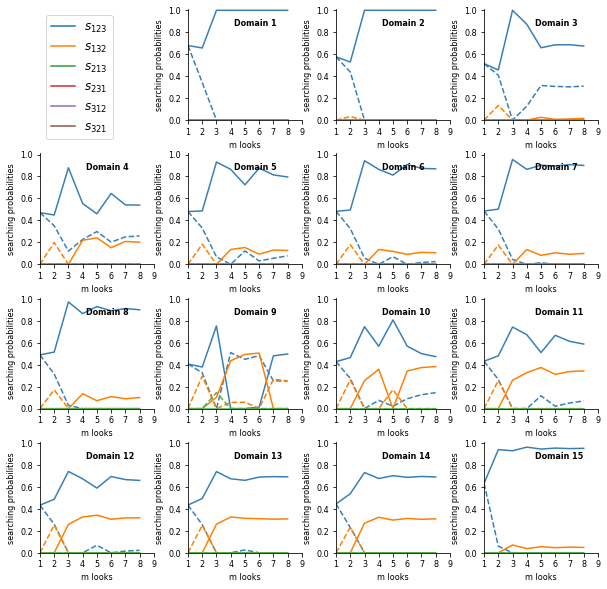

In [10]:
x_formatter = FixedFormatter([1,2,3,4,5,6,7,8,9])
x_locator = FixedLocator([1,2,3,4,5,6,7,8,9])


fig= plt.figure(figsize=(10,10))

ax0=plt.subplot2grid((4,4),(0,0))
ax1=plt.subplot2grid((4,4),(0,1))
ax2=plt.subplot2grid((4,4),(0,2))
ax3=plt.subplot2grid((4,4),(0,3))
ax4=plt.subplot2grid((4,4),(1,0))
ax5=plt.subplot2grid((4,4),(1,1))
ax6=plt.subplot2grid((4,4),(1,2))
ax7=plt.subplot2grid((4,4),(1,3))
ax8=plt.subplot2grid((4,4),(2,0))
ax9=plt.subplot2grid((4,4),(2,1))
ax10=plt.subplot2grid((4,4),(2,2))
ax11=plt.subplot2grid((4,4),(2,3))
ax12=plt.subplot2grid((4,4),(3,0))
ax13=plt.subplot2grid((4,4),(3,1))
ax14=plt.subplot2grid((4,4),(3,2))
ax15=plt.subplot2grid((4,4),(3,3))


ax0.plot([10],[10],label=r'$s_{123}$')
ax0.plot([10],[10],label=r'$s_{132}$')
ax0.plot([10],[10],label=r'$s_{213}$')
ax0.plot([10],[10],label=r'$s_{231}$')
ax0.plot([10],[10],label=r'$s_{312}$')
ax0.plot([10],[10],label=r'$s_{321}$')
ax0.set_ylim([0,1])
ax0.legend(loc=2, prop={'size': fsize+4})
ax0.set_axis_off()

quoi=1
player='searching '

values01=plots_only(probas01, ax1, [1,9],quoi)
values02=plots_only(probas02, ax2, [1,9],quoi)
values03=plots_only(probas03, ax3, [1,9],quoi)
values04=plots_only(probas04, ax4, [1,9],quoi)
values05=plots_only(probas05, ax5, [1,9],quoi)
values06=plots_only(probas06, ax6, [1,9],quoi)
values07=plots_only(probas07, ax7, [1,9],quoi)
values08=plots_only(probas08, ax8, [1,9],quoi)
values09=plots_only(probas09, ax9, [1,9],quoi)
values10 =plots_only(probas10,ax10,[1,9],quoi)
values11 =plots_only(probas11,ax11,[1,9],quoi)
values12 =plots_only(probas12,ax12,[1,9],quoi)
values13 =plots_only(probas13,ax13,[1,9],quoi)
values14 =plots_only(probas14,ax14,[1,9],quoi)
values15 =plots_only(probas15,ax15,[1,9],quoi)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)
ax15.spines['top'].set_visible(False)
ax15.spines['right'].set_visible(False)


ax1.text(0.4,0.85,'Domain 1',transform=ax1.transAxes, fontsize=fsize,fontweight='bold')
ax2.text(0.4,0.85,'Domain 2',transform=ax2.transAxes, fontsize=fsize,fontweight='bold')
ax3.text(0.45,0.85,'Domain 3',transform=ax3.transAxes, fontsize=fsize,fontweight='bold')
ax4.text(0.4,0.85,'Domain 4',transform=ax4.transAxes, fontsize=fsize,fontweight='bold')
ax5.text(0.4,0.85,'Domain 5',transform=ax5.transAxes, fontsize=fsize,fontweight='bold')
ax6.text(0.4,0.85,'Domain 6',transform=ax6.transAxes, fontsize=fsize,fontweight='bold')
ax7.text(0.45,0.85,'Domain 7',transform=ax7.transAxes, fontsize=fsize,fontweight='bold')
ax8.text(0.4,0.85,'Domain 8',transform=ax8.transAxes, fontsize=fsize,fontweight='bold')
ax9.text(0.4,0.85,'Domain 9',transform=ax9.transAxes, fontsize=fsize,fontweight='bold')
ax10.text(0.4,0.85,'Domain 10',transform=ax10.transAxes, fontsize=fsize,fontweight='bold')
ax11.text(0.45,0.85,'Domain 11',transform=ax11.transAxes, fontsize=fsize,fontweight='bold')
ax12.text(0.4,0.85,'Domain 12',transform=ax12.transAxes, fontsize=fsize,fontweight='bold')
ax13.text(0.4,0.85,'Domain 13',transform=ax13.transAxes, fontsize=fsize,fontweight='bold')
ax14.text(0.4,0.85,'Domain 14',transform=ax14.transAxes, fontsize=fsize,fontweight='bold')
ax15.text(0.45,0.85,'Domain 15',transform=ax15.transAxes, fontsize=fsize,fontweight='bold')


ax1.xaxis.set_major_formatter(x_formatter)
ax1.xaxis.set_major_locator(x_locator)
ax2.xaxis.set_major_formatter(x_formatter)
ax2.xaxis.set_major_locator(x_locator)
ax3.xaxis.set_major_formatter(x_formatter)
ax3.xaxis.set_major_locator(x_locator)
ax4.xaxis.set_major_formatter(x_formatter)
ax4.xaxis.set_major_locator(x_locator)
ax5.xaxis.set_major_formatter(x_formatter)
ax5.xaxis.set_major_locator(x_locator)
ax6.xaxis.set_major_formatter(x_formatter)
ax6.xaxis.set_major_locator(x_locator)
ax7.xaxis.set_major_formatter(x_formatter)
ax7.xaxis.set_major_locator(x_locator)
ax8.xaxis.set_major_formatter(x_formatter)
ax8.xaxis.set_major_locator(x_locator)
ax9.xaxis.set_major_formatter(x_formatter)
ax9.xaxis.set_major_locator(x_locator)
ax10.xaxis.set_major_formatter(x_formatter)
ax10.xaxis.set_major_locator(x_locator)
ax11.xaxis.set_major_formatter(x_formatter)
ax11.xaxis.set_major_locator(x_locator)
ax12.xaxis.set_major_formatter(x_formatter)
ax12.xaxis.set_major_locator(x_locator)
ax13.xaxis.set_major_formatter(x_formatter)
ax13.xaxis.set_major_locator(x_locator)
ax14.xaxis.set_major_formatter(x_formatter)
ax14.xaxis.set_major_locator(x_locator)
ax15.xaxis.set_major_formatter(x_formatter)
ax15.xaxis.set_major_locator(x_locator)

ax1.set_xlabel('m looks', fontsize=fsize)
ax2.set_xlabel('m looks', fontsize=fsize)
ax3.set_xlabel('m looks', fontsize=fsize)
ax4.set_xlabel('m looks', fontsize=fsize)
ax5.set_xlabel('m looks', fontsize=fsize)
ax6.set_xlabel('m looks', fontsize=fsize)
ax7.set_xlabel('m looks', fontsize=fsize)
ax8.set_xlabel('m looks', fontsize=fsize)
ax9.set_xlabel('m looks', fontsize=fsize)
ax10.set_xlabel('m looks', fontsize=fsize)
ax11.set_xlabel('m looks', fontsize=fsize)
ax12.set_xlabel('m looks', fontsize=fsize)
ax13.set_xlabel('m looks', fontsize=fsize)
ax14.set_xlabel('m looks', fontsize=fsize)
ax15.set_xlabel('m looks', fontsize=fsize)


ax1.set_ylabel(player+'probabilities', fontsize=fsize)
ax2.set_ylabel(player+'probabilities', fontsize=fsize)
ax3.set_ylabel(player+'probabilities', fontsize=fsize)
ax4.set_ylabel(player+'probabilities', fontsize=fsize)
ax5.set_ylabel(player+'probabilities', fontsize=fsize)
ax6.set_ylabel(player+'probabilities', fontsize=fsize)
ax7.set_ylabel(player+'probabilities', fontsize=fsize)
ax8.set_ylabel(player+'probabilities', fontsize=fsize)
ax9.set_ylabel(player+'probabilities', fontsize=fsize)
ax10.set_ylabel(player+'probabilities', fontsize=fsize)
ax11.set_ylabel(player+'probabilities', fontsize=fsize)
ax12.set_ylabel(player+'probabilities', fontsize=fsize)
ax13.set_ylabel(player+'probabilities', fontsize=fsize)
ax14.set_ylabel(player+'probabilities', fontsize=fsize)
ax15.set_ylabel(player+'probabilities', fontsize=fsize)


ax1.tick_params(axis='x', labelsize=fsize)
ax1.tick_params(axis='y', labelsize=fsize)
ax2.tick_params(axis='x', labelsize=fsize)
ax2.tick_params(axis='y', labelsize=fsize)
ax3.tick_params(axis='x', labelsize=fsize)
ax3.tick_params(axis='y', labelsize=fsize)
ax4.tick_params(axis='x', labelsize=fsize)
ax4.tick_params(axis='y', labelsize=fsize)
ax5.tick_params(axis='x', labelsize=fsize)
ax5.tick_params(axis='y', labelsize=fsize)
ax6.tick_params(axis='x', labelsize=fsize)
ax6.tick_params(axis='y', labelsize=fsize)
ax7.tick_params(axis='x', labelsize=fsize)
ax7.tick_params(axis='y', labelsize=fsize)
ax8.tick_params(axis='x', labelsize=fsize)
ax8.tick_params(axis='y', labelsize=fsize)
ax9.tick_params(axis='x', labelsize=fsize)
ax9.tick_params(axis='y', labelsize=fsize)
ax10.tick_params(axis='x', labelsize=fsize)
ax10.tick_params(axis='y', labelsize=fsize)
ax11.tick_params(axis='x', labelsize=fsize)
ax11.tick_params(axis='y', labelsize=fsize)
ax12.tick_params(axis='x', labelsize=fsize)
ax12.tick_params(axis='y', labelsize=fsize)
ax13.tick_params(axis='x', labelsize=fsize)
ax13.tick_params(axis='y', labelsize=fsize)
ax14.tick_params(axis='x', labelsize=fsize)
ax14.tick_params(axis='y', labelsize=fsize)
ax15.tick_params(axis='x', labelsize=fsize)
ax15.tick_params(axis='y', labelsize=fsize)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

# Construct Domains

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


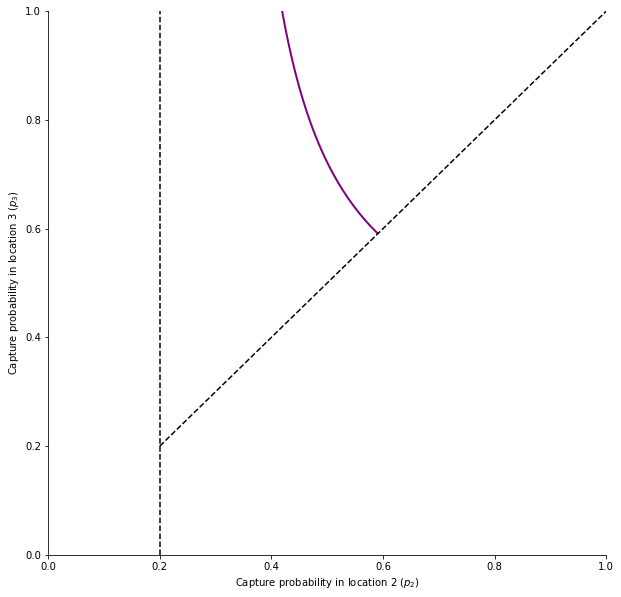

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


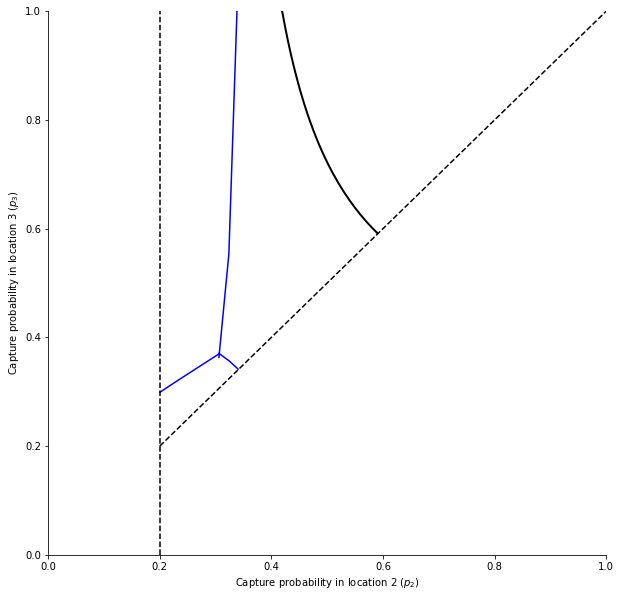

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


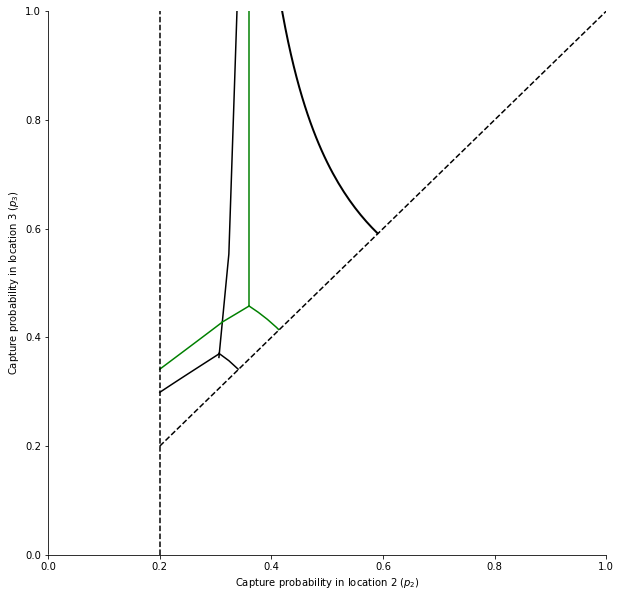

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


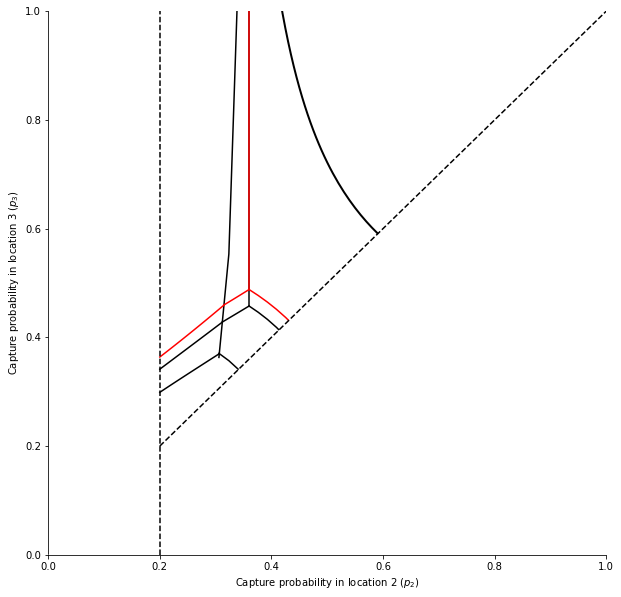

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


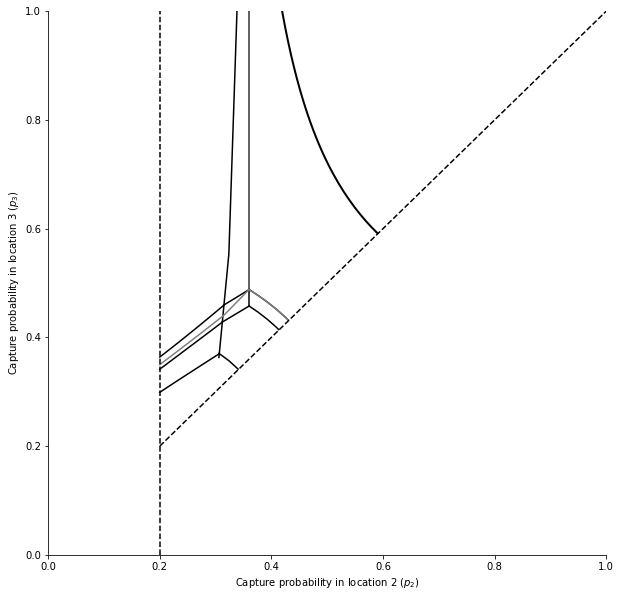

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/1152223303.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)


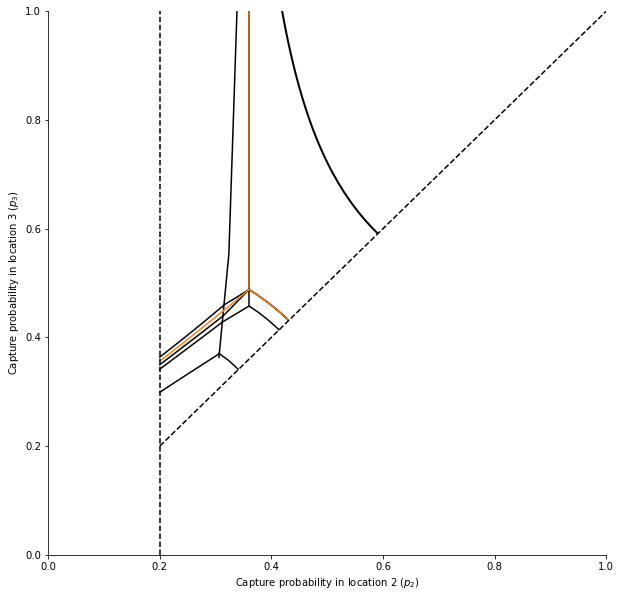

In [15]:
fig,ax= plt.subplots(figsize=(10,10))


def scale_domains(ax):
    Xfull=np.linspace(p1,1,40)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.plot(Xfull,Xfull,color='black',linestyle='dashed',zorder=5)
    ax.vlines(p1,0,1,color='black',linestyle='dashed',zorder=6)
    t1 = patches.Polygon([[0,0],[1.1,0],[1.1,1.1]], color='white',zorder=5)
    ax.add_patch(t1)
    epsilon=0.02
    rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)
    ax.add_patch(rect)
    ax.set_xlabel(r'Capture probability in location 2 $(p_2)$')
    ax.set_ylabel(r'Capture probability in location 3 $(p_3)$')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
def scale_domains_special(ax):
    Xfull=np.linspace(p1,1,40)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.plot(Xfull,Xfull,color='black',linestyle='dashed',zorder=5)
    ax.vlines(p1,0,1,color='black',linestyle='dashed',zorder=6)
    t1 = patches.Polygon([[0,0],[1,0],[1,1]], color='white',zorder=5)
    ax.add_patch(t1)
    epsilon=0.01
    rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)
    ax.add_patch(rect)
    ax.set_xlabel(r'Capture probability in location 2 $(p_2)$')
    ax.set_ylabel(r'Capture probability in location 3 $(p_3)$')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'purple') #B1,Cmod
scale_domains_special(ax)

plt.show()
fig,ax= plt.subplots(figsize=(10,10))
ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'blue') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
scale_domains(ax)

plt.show()
fig,ax= plt.subplots(figsize=(10,10))
ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'green') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
scale_domains(ax)

plt.show()
fig,ax= plt.subplots(figsize=(10,10))
ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'black') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
M2=args4[-1]
args5=Domain_5(p1,True,ax,L1,bracketmax,'red') #xcross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b
scale_domains(ax)

plt.show()
fig,ax= plt.subplots(figsize=(10,10))
ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'black') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
M2=args4[-1]
args5=Domain_5(p1,True,ax,L1,bracketmax,'black') #xcross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b
xcross5=args5[0]
ycross5=args5[1]
Xm5=args5[2]
N2m=args5[3]
args6= Domain_6(p1,True,ax,L1,xcross5,ycross5,bracketmax,'tab:grey',Xm5,N2m) #xintercross6,Xm5,N2m,Xhalf2_v6,P3,Xhalf1_v6,P3b
scale_domains(ax)
#xcross5,ycross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b


plt.show()
fig,ax= plt.subplots(figsize=(10,10))
ax=ax
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'black') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
M2=args4[-1]
args5=Domain_5(p1,True,ax,L1,bracketmax,'black') #xcross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b
xcross5=args5[0]
ycross5=args5[1]
args6= Domain_6(p1,True,ax,L1,xcross5,ycross5,bracketmax,'black',Xm5,N2m) #xintercross6,Xm5,N2m,Xhalf2_v6,P3,Xhalf1_v6,P3b
xintercross6=args6[0] 


args7= Domain_7(p1,True,ax,L1,xcross5,ycross5,xintercross6,bracketmax,'tab:orange',Xm5,N2m)
scale_domains(ax)


# Figure 3 of the paper

C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/800628164.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(x_formatter)
C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/800628164.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(x_formatter)
C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/800628164.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.xaxis.set_major_formatter(x_formatter)
C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/800628164.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_major_formatter(x_formatter)
C:\Users\PaulWork\AppData\Local\Temp/ipykernel_31576/800628164.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.xaxis.set_major_formatter(x_formatter)
C:\Users\PaulWork\AppData\Local\Temp/ipykernel_315

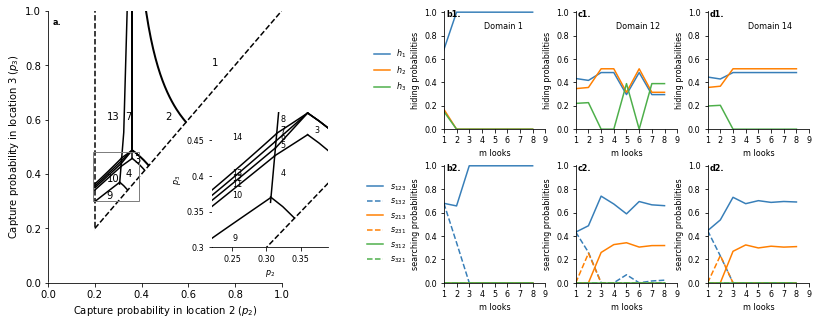

In [29]:
fig= plt.figure(figsize=(16,5))
ax0=plt.subplot2grid((2,7),(0,2))
axB0=plt.subplot2grid((2,7),(1,2))
ax1=plt.subplot2grid((2,7),(0,3))
ax2=plt.subplot2grid((2,7),(0,4))
ax3=plt.subplot2grid((2,7),(0,5))
ax4=plt.subplot2grid((2,7),(1,3))
ax5=plt.subplot2grid((2,7),(1,4))
ax6=plt.subplot2grid((2,7),(1,5))
ax16=plt.subplot2grid((2,7),(0,0), colspan=2, rowspan=2)
#ax17=plt.subplot2grid((4,7),(2,4), colspan=2, rowspan=2)

colors=['#377eb8', '#ff7f00', '#4daf4a']
colorbis=['#377eb8','#377eb8', '#ff7f00','#ff7f00', '#4daf4a', '#4daf4a']


ax0.plot([10],[10],label=r'$h_1$',linestyle='-',color=colors[0])
ax0.plot([10],[10],label=r'$h_2$',linestyle='-',color=colors[1])
ax0.plot([10],[10],label=r'$h_3$',linestyle='-',color=colors[2])
ax0.set_ylim([0,1])
ax0.legend(loc=7, prop={'size': fsize}, frameon=False)
ax0.set_axis_off()
axB0.plot([10],[10],label=r'$s_{123}$',linestyle='-',color=colors[0])
axB0.plot([10],[10],label=r'$s_{132}$',linestyle='--',color=colors[0])
axB0.plot([10],[10],label=r'$s_{213}$',linestyle='-',color=colors[1])
axB0.plot([10],[10],label=r'$s_{231}$',linestyle='--',color=colors[1])
axB0.plot([10],[10],label=r'$s_{312}$',linestyle='-',color=colors[2])
axB0.plot([10],[10],label=r'$s_{321}$',linestyle='--',color=colors[2])
axB0.set_ylim([0,1])
axB0.legend(loc=7, prop={'size': fsize}, frameon=False)
axB0.set_axis_off()
x_formatter = FixedFormatter([1,2,3,4,5,6,7,8,9])
x_locator = FixedLocator([1,2,3,4,5,6,7,8,9])
ax1.set_xlabel('m looks', fontsize=fsize)
ax1.xaxis.set_major_formatter(x_formatter)
ax1.xaxis.set_major_locator(x_locator)
ax2.set_xlabel('m looks', fontsize=fsize)
ax2.xaxis.set_major_formatter(x_formatter)
ax2.xaxis.set_major_locator(x_locator)
ax3.set_xlabel('m looks', fontsize=fsize)
ax3.xaxis.set_major_formatter(x_formatter)
ax3.xaxis.set_major_locator(x_locator)
ax4.set_xlabel('m looks', fontsize=fsize)
ax4.xaxis.set_major_formatter(x_formatter)
ax4.xaxis.set_major_locator(x_locator)
ax5.set_xlabel('m looks', fontsize=fsize)
ax5.xaxis.set_major_formatter(x_formatter)
ax5.xaxis.set_major_locator(x_locator)
ax6.set_xlabel('m looks', fontsize=fsize)
ax6.xaxis.set_major_formatter(x_formatter)
ax6.xaxis.set_major_locator(x_locator)
ax1.tick_params(axis='x', labelsize=fsize)
ax1.tick_params(axis='y', labelsize=fsize)
ax2.tick_params(axis='x', labelsize=fsize)
ax2.tick_params(axis='y', labelsize=fsize)
ax3.tick_params(axis='x', labelsize=fsize)
ax3.tick_params(axis='y', labelsize=fsize)
ax4.tick_params(axis='x', labelsize=fsize)
ax4.tick_params(axis='y', labelsize=fsize)
ax5.tick_params(axis='x', labelsize=fsize)
ax5.tick_params(axis='y', labelsize=fsize)
ax6.tick_params(axis='x', labelsize=fsize)
ax6.tick_params(axis='y', labelsize=fsize)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax16.spines['top'].set_visible(False)
ax16.spines['right'].set_visible(False)


#Optimal probabilities for a subset of probabilities triplets
values01=plots_only(probas01, ax1, [1,9],quoi=0)
values02=plots_only(probas12, ax2, [1,9],quoi=0)
values03=plots_only(probas14, ax3, [1,9],quoi=0)
ax1.set_ylabel('hiding probabilities', fontsize=fsize)
ax2.set_ylabel('hiding probabilities', fontsize=fsize)
ax3.set_ylabel('hiding probabilities', fontsize=fsize)
values04=plots_only(probas01, ax4, [1,9],quoi=1)
values05=plots_only(probas12, ax5, [1,9],quoi=1)
values06=plots_only(probas14, ax6, [1,9],quoi=1)
ax4.set_ylabel('searching probabilities', fontsize=fsize)
ax5.set_ylabel('searching probabilities', fontsize=fsize)
ax6.set_ylabel('searching probabilities', fontsize=fsize)
ax1.text(0.4,0.85,'Domain 1',transform=ax1.transAxes, fontsize=fsize)
ax2.text(0.4,0.85,'Domain 12',transform=ax2.transAxes, fontsize=fsize)
ax3.text(0.4,0.85,'Domain 14',transform=ax3.transAxes, fontsize=fsize)


#Domains
ax=ax16
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'black') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
M2=args4[-1]
args5=Domain_5(p1,True,ax,L1,bracketmax,'black') #xcross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b
xcross5=args5[0]
ycross5=args5[1]
Xm5=args5[2]
N2m=args5[3]
args6= Domain_6(p1,True,ax,L1,xcross5,ycross5,bracketmax,'black',Xm5,N2m) #xintercross6,Xm5,N2m,Xhalf2_v6,P3,Xhalf1_v6,P3b
xintercross6=args6[0] 
Domain_7(p1,True,ax,L1,xcross5,ycross5,xintercross6,bracketmax,'black',Xm5,N2m)
Xfull=np.linspace(p1,1,40)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.plot(Xfull,Xfull,color='black',linestyle='dashed',zorder=5)
ax.vlines(p1,0,1,color='black',linestyle='dashed',zorder=5)
t1 = patches.Polygon([[0,0],[1,0],[1,1]], color='white',zorder=5)
ax.add_patch(t1)
epsilon=0.02
rect = patches.Rectangle((0+epsilon, 0+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)
ax.add_patch(rect)
windowsx=0.5-0.3
windowsy=0.5-0.3
startx=0.1
starty=0.1
ax17=ax16.inset_axes([0.7, 0.13, 0.5, 0.5],facecolor='white') 
ax=ax17
p1=0.2
bracketmax=0.6+p1
B1,Cmod=Domain_2(p1,True,ax,bracketmax,'black') #B1,Cmod
args3=Domain_3(p1,True,ax,bracketmax,'black') #L1,Xm3,L1m,Xm3,L2m,Xred3,L3
L1=args3[0]
args4=Domain_4(p1,True,ax,L1,bracketmax,'black') #Xm4,M2m,Xhalf2_v4,M3,Xhalf1_v4,M3b,M2
M2=args4[-1]
args5=Domain_5(p1,True,ax,L1,bracketmax,'black') #xcross5,Xm5,N2m,Xhalf2_v5,N3,Xhalf1_v5,N3b
xcross5=args5[0]
ycross5=args5[1]
Xm5=args5[2]
N2m=args5[3]
args6= Domain_6(p1,True,ax,L1,xcross5,ycross5,bracketmax,'black',Xm5,N2m) #xintercross6,Xm5,N2m,Xhalf2_v6,P3,Xhalf1_v6,P3b
xintercross6=args6[0] 
Domain_7(p1,True,ax,L1,xcross5,ycross5,xintercross6,bracketmax,'black',Xm5,N2m)
Xfull=np.linspace(p1,1,40)
ax.set_xlim([p1,0.5])
ax.set_ylim([p1,0.5])
ax.plot(Xfull,Xfull,color='black',linestyle='dashed',zorder=5)
ax.vlines(p1,0,1,color='black',linestyle='dashed',zorder=5)
t1 = patches.Polygon([[0,0],[1,0],[1,1]], color='white',zorder=5)
ax.add_patch(t1)
epsilon=0.02
rect = patches.Rectangle((p1+epsilon, p1+epsilon), p1, 1, color='white', alpha=1 ,linewidth=0, edgecolor='r', facecolor='none',zorder=3)
ax.add_patch(rect)
x_formatter_17 = FixedFormatter([0.30, 0.35, 0.40, 0.45])
x_locator_17 = FixedLocator([0.30, 0.35, 0.40, 0.45])
ax17.yaxis.set_major_formatter(x_formatter_17)
ax17.yaxis.set_major_locator(x_locator_17)
ax16.text(0.25,0.6,'13')
ax16.text(0.33,0.6 , '7',zorder=12)
ax16.text(0.37,0.44 , '3',zorder=12)
ax16.text(0.33,0.39 , '4',zorder=12)
ax16.text(0.5,0.6 , '2')
ax16.text(0.7,0.8 , '1')
ax16.text(0.25, 0.31, '9',zorder=12)
ax16.text(0.25, 0.37, '10',zorder=12)

fsize2=8
ax17.text(0.32,0.4, '4',zorder=12,fontsize=fsize2)
ax17.text(0.32,0.44, '5',zorder=12,fontsize=fsize2)
ax17.text(0.32,0.45, '6',zorder=12,fontsize=fsize2)
ax17.text(0.32,0.46, '7',zorder=12,fontsize=fsize2)
ax17.text(0.32,0.475, '8',zorder=12,fontsize=fsize2)
ax17.text(0.25, 0.31, '9',zorder=12,fontsize=fsize2)
ax17.text(0.25, 0.37, '10',zorder=12,fontsize=fsize2)
ax17.text(0.25, 0.385, '11',zorder=12,fontsize=fsize2)
ax17.text(0.25, 0.393, '12',zorder=12,fontsize=fsize2)
ax17.text(0.25,0.4, '13',zorder=12,fontsize=fsize2)
ax17.text(0.25, 0.45, '14',zorder=12,fontsize=fsize2)
ax17.text(0.37, 0.46, '3',zorder=12,fontsize=fsize2)
ax17.set_ylim([0.3,0.49])
ax17.set_xlim([0.22,0.39])
ax16.set_xlabel(r'Capture probability in location 2 $(p_2)$')
ax16.set_ylabel(r'Capture probability in location 3 $(p_3)$')
ax17.set_xlabel(r'$p_2$',fontsize=fsize2)
ax17.set_ylabel(r'$p_3$',fontsize=fsize2)
rect = patches.Rectangle((0.19, 0.3), 0.5-0.3, 0.37-0.19, linewidth=1, edgecolor='tab:grey', facecolor='none',zorder=12)
ax16.add_patch(rect)
ax17.spines['top'].set_visible(False)
ax17.spines['right'].set_visible(False)
ax17.tick_params(axis='x', labelsize=fsize2)
ax17.tick_params(axis='y', labelsize=fsize2)



ax16.text(0.02,0.95,"a.", fontsize=fsize,fontweight='bold',  transform=ax16.transAxes)
ax1.text(0.02,0.95,"b1.", fontsize=fsize,fontweight='bold',  transform=ax1.transAxes)
ax2.text(0.02,0.95,"c1.", fontsize=fsize,fontweight='bold',  transform=ax2.transAxes)
ax3.text(0.02,0.95,"d1.", fontsize=fsize,fontweight='bold',  transform=ax3.transAxes)
ax4.text(0.02,0.95,"b2.", fontsize=fsize,fontweight='bold',  transform=ax4.transAxes)
ax5.text(0.02,0.95,"c2.", fontsize=fsize,fontweight='bold',  transform=ax5.transAxes)
ax6.text(0.02,0.95,"d2.", fontsize=fsize,fontweight='bold',  transform=ax6.transAxes)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()